In [1]:
import os
import torchvision
# import utils
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display
from PIL import Image
import pandas as pd
import shutil
import evals.embed_evals as evals
import models.utils as utils
from sklearn.linear_model import LogisticRegression

## Generate new decision boundary

In [2]:
def pseudo_label(w, b, row, selected_features):
    x = np.array(row[selected_features[0]])
    y = np.array(row[selected_features[1]])
    y_prime = w*x+b

    if y > y_prime: return 1
    else: return 0


def pseudo_label_2feat(clf, row, selected_features):
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    b = -b/w2
    w1 = -w1/w2

    x = np.array(row[selected_features[0]])
    y = np.array(row[selected_features[1]])
    y_prime = w1*x+b

    if y > y_prime: return 1
    else: return 0
    
def pseudo_label_4fea(clf,x1,x2,x3,x4):
    w1, w2, w3, w4 = clf.coef_.T
    b = clf.intercept_[0]

    b = -b/w4
    w1 = -w1/w4
    w2 = -w2/w4
    w3 = -w3/w4
    ws = np.squeeze(np.array([w1,w2,w3]))
    xs = np.array([x1,x2,x3])
    l_prime = np.dot(ws,xs)+b
    if x4 > l_prime: return 1
    else: return 0

# df["pseudo_label"] = df.apply(lambda row : pseudo_label_4fea(clf, row[selected_features[0]],row[selected_features[1]],row[selected_features[2]],row[selected_features[3]]), axis = 1)
# plot_3d(df, selected_features, clf, "pseudo_label")

def plot_2feat(df, selected_features, clf, label="label"):
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    b = -b/w2
    w1 = -w1/w2

    min_x = min(df[selected_features[0]])
    max_x = max(df[selected_features[0]])
    xd = np.array([min_x,max_x])
    yd = w1*xd + b
    plt.plot(xd, yd, 'k', lw=3, ls='--')
    plt.scatter(df[selected_features[0]],df[selected_features[1]], c=df[label], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

    plt.ylabel(selected_features[1])
    plt.xlabel(selected_features[0])
    plt.show()

def plot_3d(df, selected_features, clf, label="label"):
    b = clf.intercept_[0]
    w1, w2, w3 = clf.coef_.T
    b = -b/w3
    w2 = -w2/w3
    w1 = -w1/w3
    X = np.linspace(-2,2,100)
    Y = np.linspace(-2,2,100)
    X, Y = np.meshgrid(X, Y)
    Z = w1*X + w2*Y + b
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(projection='3d')
    ax.view_init(10, 30)
    colors = ["r","g"]
    for i in range(len(df)):
        ax.scatter(df[selected_features[0]][i], df[selected_features[1]][i], df[selected_features[2]][i], c=colors[df[label][i]])
    ax.plot_surface(X, Y, Z, alpha=0.5)
    plt.show()

In [3]:
df = pd.read_csv("/net/scratch/tianh-shared/wv_3d/data.csv")
selected_features = ["head size","body size"]
# clf = LogisticRegression().fit(df[selected_features],df['label'])
# df['pseudo_label'] = df.apply(lambda row : pseudo_label_2feat(clf,row, selected_features), axis = 1)
# plot_2feat(df, selected_features, clf,"pseudo_label")

In [ ]:
colors=["r","g"]
for i in range(len(df)):
    plt.scatter(df[selected_features[0]][i], df[selected_features[1]][i], c=colors[df["label"][i]])

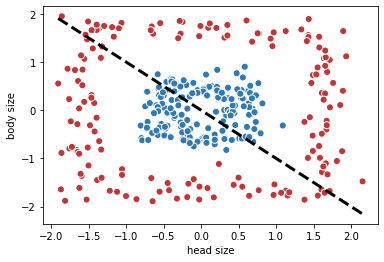

In [4]:
w1 = -1
b = 0

min_x = min(df[selected_features[0]])
max_x = max(df[selected_features[0]])
xd = np.array([min_x,max_x])
yd = w1*xd + b
plt.plot(xd, yd, 'k', lw=3, ls='--')
plt.scatter(df[selected_features[0]],df[selected_features[1]], c=df["label"], s=50,
        cmap="RdBu", vmin=-.2, vmax=1.2,
        edgecolor="white", linewidth=1)

plt.ylabel(selected_features[1])
plt.xlabel(selected_features[0])
plt.show()

In [6]:
df['pseudo_label'] = df.apply(lambda row : pseudo_label(w1, b, row, selected_features), axis = 1)

In [8]:
for i in range(len(df)):
    c = str(df.iloc[i]["pseudo_label"])
    img = df.iloc[i]["img_id"]
    src = os.path.join("/net/scratch/tianh-shared/wv_3d/imgs",img)
    dst = os.path.join("/net/scratch/tianh-shared/wv_3d/2feats",c)
    shutil.copy(src, dst) 

In [11]:
"0.png"[:-4]

'0'

In [10]:
df

,Unnamed: 0,img_id,label,head size,body size,tail size,texture,pseudo_label2,pseudo_label
0,0,0.png,0,1.637854,1.078957,0.313675,-0.313675,1,1
1,1,1.png,0,-1.659968,-0.824899,-0.543817,0.543817,0,0
2,2,2.png,0,-1.856387,1.950230,1.379527,-1.379527,1,1
3,3,3.png,0,1.554202,0.886635,-0.603218,0.603218,1,1
4,4,4.png,0,1.681563,0.794190,1.105545,-1.105545,1,1
...,...,...,...,...,...,...,...,...,...
315,315,315.png,1,-0.356652,0.554175,0.599029,-0.599029,1,1
316,316,316.png,1,-0.509185,0.370120,-0.135512,0.135512,0,0
317,317,317.png,0,0.968567,1.615310,-0.492433,0.492433,1,1
318,318,318.png,1,0.557385,0.679140,1.027593,-1.027593,1,1


In [13]:
data_dir = "/net/scratch/tianh-shared/wv_3d/2feats/auto_split"
for split in ["train","valid","test"]:
    split_dir = os.path.join(data_dir, split)
    split_imgs = utils.dataset_filenames(split_dir)[:,0]
    split_imgs = [int(x.split("/")[-1][:-4]) for x in split_imgs]
    print(split_imgs)
    break

[1, 10, 102, 104, 105, 106, 11, 115, 118, 13, 132, 133, 134, 137, 139, 141, 150, 153, 155, 156, 16, 162, 163, 167, 17, 171, 172, 18, 184, 186, 187, 190, 202, 211, 22, 221, 222, 223, 227, 229, 23, 231, 233, 235, 238, 244, 256, 26, 262, 266, 267, 271, 276, 277, 279, 281, 29, 290, 293, 295, 296, 297, 299, 30, 305, 307, 316, 34, 36, 38, 40, 43, 44, 5, 51, 58, 59, 6, 61, 64, 65, 66, 67, 72, 74, 76, 77, 8, 81, 86, 87, 89, 91, 93, 94, 95, 99, 0, 100, 108, 114, 116, 120, 121, 124, 129, 130, 14, 142, 143, 148, 15, 151, 152, 157, 161, 166, 168, 169, 174, 176, 177, 178, 179, 180, 181, 185, 189, 191, 192, 194, 197, 199, 2, 20, 203, 214, 217, 219, 225, 232, 236, 240, 242, 243, 246, 252, 253, 255, 257, 258, 261, 264, 265, 268, 27, 274, 278, 282, 283, 284, 286, 287, 289, 291, 292, 298, 300, 302, 304, 312, 313, 315, 317, 33, 39, 4, 42, 49, 50, 52, 56, 60, 62, 68, 69, 70, 75, 78, 82, 84, 85, 88, 90, 92, 96]


## Human distorted space

In [132]:
test = np.random.choice(np.arange(len(df)), int(len(df)*0.2), replace=False)
train = np.setdiff1d(np.arange(len(df)), test)
train_df = df.iloc[train]
test_df = df.iloc[test]

In [133]:
selected_features = ["head size","body size", "tail size", "texture"]
train_x = np.array(train_df[selected_features])
train_y = np.array(train_df["pseudo_label"])
test_x = np.array(test_df[selected_features])
test_y = np.array(test_df["pseudo_label"])

In [134]:
evals.distorted_1nn(train_x, train_y, test_x, test_y, [1,1,0,0], [2,2,2,2])

1.0

In [102]:
evals.distorted_1nn(train_x, train_y, test_x, test_y, [0, 1, 1, 10000], [2,2,2,2])

0.734375

In [150]:
scores = []
weights = list(itertools.product([0, 1], repeat=4))[1:]
scores = [evals.distorted_1nn(train_x, train_y, test_x, test_y, w, [2,2,2,2]) for w in weights]
df_search = pd.DataFrame({'weights': weights, "scores":scores})
df_search

,weights,scores
0,"(0, 0, 0, 1)",0.453125
1,"(0, 0, 1, 0)",0.453125
2,"(0, 0, 1, 1)",0.453125
3,"(0, 1, 0, 0)",0.656250
4,"(0, 1, 0, 1)",0.718750
5,"(0, 1, 1, 0)",0.718750
6,"(0, 1, 1, 1)",0.687500
7,"(1, 0, 0, 0)",0.703125
8,"(1, 0, 0, 1)",0.625000
9,"(1, 0, 1, 0)",0.625000


In [151]:
scores = []
weights = list(itertools.product([0, 1], repeat=4))[1:]
scores = [evals.distorted_1nn(train_x, train_y, test_x, test_y, w, [1,1,1,1]) for w in weights]
df_search = pd.DataFrame({'weights': weights, "scores":scores})
df_search

/net/scratch/tianh/explain_teach/evals/embed_evals.py:95: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((weights*q**powers).sum())


,weights,scores
0,"(0, 0, 0, 1)",0.500000
1,"(0, 0, 1, 0)",0.453125
2,"(0, 0, 1, 1)",0.500000
3,"(0, 1, 0, 0)",0.437500
4,"(0, 1, 0, 1)",0.328125
5,"(0, 1, 1, 0)",0.437500
6,"(0, 1, 1, 1)",0.437500
7,"(1, 0, 0, 0)",0.437500
8,"(1, 0, 0, 1)",0.437500
9,"(1, 0, 1, 0)",0.437500


In [139]:
train_x[0]

array([ 1.63785391,  1.07895743,  0.31367478, -0.31367478])

In [141]:
evals.weightedPdist(train_x[0], train_x[1], [0,0,0,0],[2,2,2,2])

0.0

In [153]:
w_cands = [-10000, -100, -1, 0, 1, 100, 10000, 0, 0,0,0]
weights = []
scores = []
for _ in range(1000):
    w = [random.choice(w_cands) for _ in range(4)]
    score = evals.distorted_1nn(train_x, train_y, test_x, test_y, w, [2,2,2,2])
    scores.append(score)
    weights.append(w)
df_search = pd.DataFrame({'weights': weights, "scores":scores})
df_search.to_csv("search.csv",index=False)

/net/scratch/tianh/explain_teach/evals/embed_evals.py:95: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((weights*q**powers).sum())


In [14]:
visual_weights = [2.73027025, 1]
w = -0.73027025
b = 0.68565111
xd = np.array([0, 1])
yd = w*xd + b
# plt.plot(xd, yd, 'k', lw=1, ls='--')
# plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.scatter(df[selected_features[0]]*np.sqrt(2.73027025),df[selected_features[1]], c=df['pseudo_label'], s=50,
        cmap="RdBu", vmin=-.2, vmax=1.2,
        edgecolor="white", linewidth=1)

plt.xlim(0, 1.4)
plt.ylim(0, 0.7)
# plt.ylim(ymin, ymax)
plt.ylabel(selected_features[1])
plt.xlabel(selected_features[0]+'--distorted')
plt.show()


## Triplet annotation
25000 from training set

10000 from validation set

function for testing set

In [8]:
# df.shape]
from itertools import combinations

df[selected_features]
a  = list(range(200))
b = list(combinations(a, 3))
print(len(b))
b_final = []
for trip in b:
    a,p,n = trip
    b_final.append([a,p,n])
    b_final.append([p,a,n])
    b_final.append([n,p,a])
print(len(b_final))
import random
SEED = 448
random.seed(SEED)
selected_triplets = random.sample(b_final, k=2000)
# len(list(combinations(list(range(120)), 3)))
# b[:100]

1313400
3940200


In [10]:
# [-0.73027025] [0.68565111]
# [-2.73027025] [1.64565111]
# m = [-2.73027025]
# c = [1.64565111]
# yd = m*xd + c

## weighted euclidean distance
def weightedL2(a, b, visual_weights):
    q = a-b
    return np.sqrt((visual_weights*q*q).sum())

visual_weights = [2.73027025, 1]

# for index, row in df.iterrows():
#     for feature in features:
#         # print(row[feature])
# random.randint(0, len(b))
for trip in selected_triplets:
    a, p, n = trip
    print(a,p,n)
    
    break
    # weightedL2()

113 39 22


In [11]:
df[(df['index']==20) | (df['index']==97) |  (df['index']==125)]
point1 = df[(df['index']==a)][selected_features].to_numpy()
point2 = df[(df['index']==p)][selected_features].to_numpy()
point3 = df[(df['index']==n)][selected_features].to_numpy()
print(weightedL2(point1,point2,visual_weights))
print(weightedL2(point1,point3,visual_weights))
print(point1,point2,visual_weights)
# np.sqrt(2.73027025*(0.24-0.19)**2+1*(0.33-0.12)**2)

0.35512083858878235
0.42748320507945103
[[0.51 0.42]] [[0.31 0.29]] [2.73027025, 1]


In [12]:
def calc_triplets(trip):
    a,p,n  = trip
    point1 = df[(df['index']==a)][selected_features].to_numpy()
    point2 = df[(df['index']==p)][selected_features].to_numpy()
    point3 = df[(df['index']==n)][selected_features].to_numpy()
    d_ap = weightedL2(point1,point2,visual_weights)
    d_an = weightedL2(point1,point3,visual_weights)
    if d_ap>d_an:
        return [a,n,p]
    else:
        return [a,p,n]
calc_triplets([97,125,20])


[97, 20, 125]

In [13]:
# # 120 40 40 
# from PIL import Image
# addr = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/szratio-contrast-2D-scatter.jpg'
# # addr = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/szratio-contrast-2D-scatter.pdf'
# display.display(display.Image(filename=addr))
# # Image.open('/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/szratio-contrast-2D-scatter.jpg').show()
# # image.show()

## Seperate train || validation || testing

In [31]:
df.shape[0]
df_train = df.sample(n=int(df.shape[0]*0.8), random_state=1)
df_test = df.drop(df_train.index)
df_val = df_train.sample(n=int(df.shape[0]*0.2), random_state=23)
df_train = df_train.drop(df_val.index)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)
# len(set(sorted(np.append(df_train['index'].to_numpy(), [df_val['index'].to_numpy(), df_test['index'].to_numpy()]))))

(120, 10)
(40, 10)
(40, 10)


In [15]:
# move images into corresponding directory
images_files = os.listdir(os.path.join(wee_ves_dir,'images'))
images_files
b = [a for a in images_files if 'jpg' in a and 'vespula' not in a]
len(b)
# sorted(b)
# df.shape
# for item in fileList:
#     shutil.copy(item[0], "/Users/username/Desktop/testPhotos")

200

In [16]:
# df[df['index']==188]
df_train['index'].to_numpy()
# shutil.copy(item[0], "/Users/username/Desktop/testPhotos")

array([ 58,  40,  34, 184, 198,  95,   4,  29, 168,  18,  11,  89, 110,
       118, 159,  16,  44,  94, 162,  38,  28,  27, 165, 194, 177, 176,
        97, 174,  73,  69, 172, 108, 107, 189,  14,  19,  39, 185, 124,
        98,  53,  33, 179, 181, 106, 199, 116,  78,   5, 127, 105,  48,
        54,  84, 183, 158, 166,  93, 120, 154,  90,  81, 122, 191,  13,
       132,  45,  99,  36, 161, 186, 153, 103, 148, 173,  21,  91, 152,
         2,  70,  85,   6,  77,  65, 167,  88, 130,  46,  62,  74,  92,
       147, 160,  87, 180, 145, 164,  10,  32,  83, 182, 100, 125,  23,
       126,   9, 135,  15,  41, 163,  80,  52,  26,  76,  43,  24,   3,
       169,  49, 131])

In [137]:
# sum(df['label'][:100])
# sum(df['pseudo_label'][:100])

In [17]:
index = 99
label = df[df['index']==index]['pseudo_label'].to_numpy()[0]
label

0

In [18]:
image_path = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/images'
def cp_image(index,split):
    label = df[df['index']==index]['pseudo_label'].to_numpy()[0]
    file_path = os.path.join('/net/scratch/chacha/data/weevil_vespula', split)
    file_path = os.path.join(file_path, str(label))
    # print(file_path)
    image_file = os.path.join(image_path, str(index)+'.jpg')
    shutil.copy(image_file, file_path)

In [19]:
train_indexs = df_train['index'].to_numpy()
# print(train_indexs)
for tr_index in train_indexs:
    cp_image(tr_index,'train')

In [21]:
val_indexs = df_val['index'].to_numpy()
for tr_index in val_indexs:
    cp_image(tr_index,'valid')

test_indexs = df_test['index'].to_numpy()
for tr_index in test_indexs:
    cp_image(tr_index,'test')

In [20]:
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/train/1')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/train/0')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/valid/1')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/valid/0')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/test/1')))
print(len(os.listdir('/net/scratch/chacha/data/weevil_vespula/test/0')))

60
60
25
15
20
20


## Sample triplets

In [22]:
## sample triplets function 
## input: a list
## output: a random list of triplets
def sample_triplets(A, number_of_triplets):
    B = list(combinations(A, 3))
    print(len(B))
    B_final = []
    for trip in B:
        a,p,n = trip
        B_final.append([a,p,n])
        B_final.append([p,a,n])
        B_final.append([n,p,a])
    print("total triplets number: ", len(B_final))
    SEED = 448
    random.seed(SEED)
    selected_triplets = random.sample(B_final, k=number_of_triplets)
    return selected_triplets

## sample 25000 training triplets
train_triplets = sample_triplets(train_indexs, 25000)
val_triplets = sample_triplets(val_indexs, 10000)



280840
total triplets number:  842520
9880
total triplets number:  29640


In [67]:
test_triplets = sample_triplets(test_indexs, 10000)

9880
total triplets number:  29640


In [24]:
# len(train_triplets)
# len(val_triplets)
train_triplets_final = []
for trip in train_triplets:
    # a,p,n = trip
    train_triplets_final.append(calc_triplets(trip))


In [27]:

valid_triplets_final = []
for trip in val_triplets:
    # a,p,n = trip
    valid_triplets_final.append(calc_triplets(trip))


In [68]:

test_triplets_final = []
for trip in test_triplets:
    # a,p,n = trip
    test_triplets_final.append(calc_triplets(trip))


In [25]:
train_triplets_final[:5]

[[6, 16, 88], [169, 118, 152], [4, 26, 159], [186, 153, 44], [172, 168, 91]]

In [28]:
# train_triplets_final_final = []
# for tmp in train_triplets_final:
#     a,p,n = tmp
#     train_triplets_final_final.append([a,p,n])
# train_triplets_final_final[:5]
valid_triplets_final_final = []
for tmp in valid_triplets_final:
    a,p,n = tmp
    valid_triplets_final_final.append([a,p,n])
valid_triplets_final_final[:5]

[[55, 136, 119],
 [64, 187, 150],
 [102, 112, 149],
 [111, 136, 104],
 [155, 151, 113]]

In [184]:
with open('/net/scratch/chacha/explain_teach/data/bm_triplets/3c2_unique=182/train_triplets.pkl','rb') as f:
    m_dict = pickle.load(f)

In [192]:
# m_dict
with open('/net/scratch/chacha/data/weevil_vespula/train_triplet.pkl','rb') as f:
    m_dict = pickle.load(f)

In [194]:
# m_dict

## file name index to triplet index

In [56]:
with open('/net/scratch/chacha/data/weevil_vespula/p2i.pkl', 'rb') as f:
  p2i = pickle.load(f)
# p2i
print(train_triplets_final[0])
print(p2i[str(6)],p2i[str(16)],p2i[str(88)])

len(train_triplets_final)
train_triplets_final_final_torch_index = []
for trip in train_triplets_final:
    a,p,n = trip
    train_triplets_final_final_torch_index.append([p2i[str(a)],p2i[str(p)],p2i[str(n)]])

[6, 16, 88]
34 5 49


In [57]:
with open('/net/scratch/chacha/data/weevil_vespula/p2i_valid.pkl', 'rb') as f:
  p2i = pickle.load(f)
len(valid_triplets_final_final)
valid_triplets_final_final_torch_index = []
for trip in valid_triplets_final_final:
    a,p,n = trip
    valid_triplets_final_final_torch_index.append([p2i[str(a)],p2i[str(p)],p2i[str(n)]])

In [70]:
with open('/net/scratch/chacha/data/weevil_vespula/p2i_test.pkl', 'rb') as f:
  p2i = pickle.load(f)
len(test_triplets_final)
test_triplets_final_final_torch_index = []
for trip in test_triplets_final:
    a,p,n = trip
    test_triplets_final_final_torch_index.append([p2i[str(a)],p2i[str(p)],p2i[str(n)]])

In [71]:
import pickle

# save_triplet_path = 
# with open('/net/scratch/chacha/data/weevil_vespula/train_triplet.pkl', 'wb') as f:
#   pickle.dump(train_triplets_final_final_torch_index, f)
# with open('/net/scratch/chacha/data/weevil_vespula/valid_triplet.pkl', 'wb') as f:
#   pickle.dump(valid_triplets_final_final_torch_index, f)
with open('/net/scratch/chacha/data/weevil_vespula/test_triplet.pkl', 'wb') as f:
  pickle.dump(test_triplets_final_final_torch_index, f)
with open('/net/scratch/chacha/data/weevil_vespula/train_triplet.pkl', 'rb') as f:
  train_triplets_final_final_torch_index = pickle.load(f)
with open('/net/scratch/chacha/data/weevil_vespula/valid_triplet.pkl', 'rb') as f:
  valid_triplets_final_final_torch_index = pickle.load(f)
with open('/net/scratch/chacha/data/weevil_vespula/test_triplet.pkl', 'rb') as f:
  test_triplets_final_final_torch_index = pickle.load(f)

In [62]:
valid_triplets_final_final_torch_index[:5]

[[39, 24, 22], [10, 33, 28], [15, 18, 27], [1, 24, 16], [30, 29, 19]]

In [63]:
train_triplets_final_final_torch_index[:5]

[[34, 5, 49], [96, 68, 82], [21, 11, 86], [108, 83, 25], [97, 95, 53]]

In [42]:
train_triplets_final_final_torch_index[:5]

[[34, 5, 49], [96, 68, 82], [21, 11, 86], [108, 83, 25], [97, 95, 53]]

In [41]:
valid_triplets_final_final_torch_index[:5]

[[39, 24, 22], [10, 33, 28], [15, 18, 27], [1, 24, 16], [30, 29, 19]]

In [74]:
test_triplets_final_final_torch_index[:10]

[[17, 5, 20],
 [31, 33, 4],
 [21, 35, 14],
 [22, 34, 5],
 [26, 38, 39],
 [2, 14, 0],
 [28, 20, 3],
 [20, 38, 19],
 [11, 19, 26],
 [34, 22, 6]]

In [75]:
for trip in test_triplets_final:
    a,p,n = trip
    print(a,p,n)
    break

79 22 115


In [76]:
test_triplets_final[:10]

[[79, 22, 115],
 [156, 175, 20],
 [121, 190, 7],
 [129, 178, 22],
 [140, 61, 8],
 [128, 7, 1],
 [142, 115, 133],
 [115, 61, 96],
 [60, 96, 140],
 [178, 129, 25]]